<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/2020_BiharElections/IndividualParties/Congress2Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (186/186), done.
remote: Total 211 (delta 73), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (211/211), 16.71 MiB | 9.73 MiB/s, done.
Resolving deltas: 100% (73/73), done.


In [ ]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler

consumer_key= "DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret  = "jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"
access_token ="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret= "cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
# authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-09-01"
date2 = "2020-11-09"


text = []


def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2).items():
        print(tweet.text)
        text.append(tweet.text)
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"#congress")  
           
data1 = list(zip(text))
df = pd.DataFrame(data =data1, columns =["Tweet"])

df.to_csv('cong.csv') 

Streaming output truncated to the last 5000 lines.

The group declared 26 victories by Wedn…
<--------------------------------------------------->
6694
RT @DeepakJ02841911: The #Congress-backed #maharashtragovt  today openly killed journalism, the fourth pillar of democracy.#ArnabGoswami's…
<--------------------------------------------------->
6695
RT @DeepakJ02841911: The #Congress-backed #maharashtragovt  today openly killed journalism, the fourth pillar of democracy.#ArnabGoswami's…
<--------------------------------------------------->
6696
RT @DeepakJ02841911: The #Congress-backed #maharashtragovt  today openly killed journalism, the fourth pillar of democracy.#ArnabGoswami's…
<--------------------------------------------------->
6697
RT @DeepakJ02841911: The #Congress-backed #maharashtragovt  today openly killed journalism, the fourth pillar of democracy.#ArnabGoswami's…
<--------------------------------------------------->
6698
RT @DeepakJ02841911: The #Congress-backed #maharasht

# **Importing Libraries**


In [ ]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# **CLEANING CONGRESS DATASET 2**

In [ ]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

7773



> **Removing duplicates tweets if any.**



In [ ]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)

3522

In [ ]:
df['Tweet'].duplicated().sum()

4251

```
Number of duplicates tweets
```



In [ ]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(3522, 1)



```
Removed all the duplicate tweets
```





> **Removing emojis**



In [ ]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)



```
From now on, all the preprocessing & modelling on tweets will be stored in the data column called 'Processed_Tweet' 
```



In [ ]:
count = 0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

679

In [ ]:
df.shape

(2843, 2)

In [ ]:
df['Processed_Tweet']

2       #BjpFailedUs नपुंसक्क government, made lots of...
5       I’m planning to share this on my FB literally ...
6       @Hackett_Graham1 @BanksPatriot @RickSantorum @...
7       @MarthaM00086745 @AOC Exactly! We The People f...
8       #trump is about to learn why you don't create ...
                              ...                        
3514    Congratulations to my good friend ⁦⁦@Financial...
3515    #Congress working under the leadership of Soni...
3519    Congrats to @ColinAllredTX  on his re-election...
3520    Political parties r like.\n\n#Congress #NCP #S...
3521    #BreakingNews #BreakingPoll #Election2020 #COV...
Name: Processed_Tweet, Length: 2843, dtype: object



>**Removing username**



In [ ]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

2       #BjpFailedUs नपुंसक्क government, made lots of...
5       I’m planning to share this on my FB literally ...
6                                 Also known as #Congress
7           Exactly! We The People from shore to shore...
8       #trump is about to learn why you don't create ...
                              ...                        
3514    Congratulations to my good friend ⁦⁦  Member ⁦...
3515    #Congress working under the leadership of Soni...
3519    Congrats to    on his re-election to #Congress...
3520    Political parties r like.\n\n#Congress #NCP #S...
3521    #BreakingNews #BreakingPoll #Election2020 #COV...
Name: Processed_Tweet, Length: 2843, dtype: object



> **Removing URL, if any**



In [ ]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

2       #BjpFailedUs नपुंसक्क government, made lots of...
5       I’m planning to share this on my FB literally ...
6                                 Also known as #Congress
7           Exactly! We The People from shore to shore...
8       #trump is about to learn why you don't create ...
                              ...                        
3514    Congratulations to my good friend ⁦⁦  Member ⁦...
3515    #Congress working under the leadership of Soni...
3519    Congrats to    on his re-election to #Congress...
3520    Political parties r like.\n\n#Congress #NCP #S...
3521    #BreakingNews #BreakingPoll #Election2020 #COV...
Name: Processed_Tweet, Length: 2843, dtype: object



> **Removing Hashtags but keeping the word**



In [ ]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

2       BjpFailedUs नपुंसक्क government, made lots of ...
5       I’m planning to share this on my FB literally ...
6                                  Also known as Congress
7           Exactly! We The People from shore to shore...
8       trump is about to learn why you don't create l...
                              ...                        
3514    Congratulations to my good friend ⁦⁦  Member ⁦...
3515    Congress working under the leadership of Sonia...
3519    Congrats to    on his re-election to Congress ...
3520    Political parties r like.\n\nCongress NCP Shiv...
3521    BreakingNews BreakingPoll Election2020 COVID19...
Name: Processed_Tweet, Length: 2843, dtype: object



> **Using Preprocessor library**



In [ ]:
!pip install tweet-preprocessor

In [ ]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

2       BjpFailedUs government, made lots of promises ...
5       Im planning to share this on my FB literally e...
6                                  Also known as Congress
7       Exactly! We The People from shore to shore bor...
8       trump is about to learn why you don't create l...
                              ...                        
3514    Congratulations to my good friend Member on hi...
3515    Congress working under the leadership of Sonia...
3519    Congrats to on his re-election to Congress as ...
3520    Political parties r like.Congress NCP Shivsena...
3521    BreakingNews BreakingPoll Election2020 COVID19...
Name: Processed_Tweet, Length: 2843, dtype: object

> **Removing any special characters, numbers, punctuations,etc..**

In [ ]:
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

2       BjpFailedUs government  made lots of promises ...
5       Im planning to share this on my FB literally e...
6                                  Also known as Congress
7       Exactly  We The People from shore to shore bor...
8       trump is about to learn why you don t create l...
                              ...                        
3514    Congratulations to my good friend Member on hi...
3515    Congress working under the leadership of Sonia...
3519    Congrats to on his re election to Congress as ...
3520    Political parties r like Congress NCP Shivsena...
3521    BreakingNews BreakingPoll Election     COVID  ...
Name: Processed_Tweet, Length: 2843, dtype: object

> **Converting to lowercase**

In [ ]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

2       bjpfailedus government  made lots of promises ...
5       im planning to share this on my fb literally e...
6                                  also known as congress
7       exactly  we the people from shore to shore bor...
8       trump is about to learn why you don t create l...
                              ...                        
3514    congratulations to my good friend member on hi...
3515    congress working under the leadership of sonia...
3519    congrats to on his re election to congress as ...
3520    political parties r like congress ncp shivsena...
3521    breakingnews breakingpoll election     covid  ...
Name: Processed_Tweet, Length: 2843, dtype: object



```
We still have to remove stopwords, perform lemmatization & do stemming. So let us proceed with that
```



In [ ]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()



> **Removing Stop Words**



In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['the', 'too', 'off', 'below', 'who', 'until', 'what', 'for', 'is', 'ourselves', 't', 'been', 'doing', "that'll", 'most', 'him', 'in', 'was', 'll', 'itself', 'you', 'each', 'further', "couldn't", 'all', "weren't", 'few', 'over', 'under', 'its', 'didn', 'himself', 'her', 'theirs', 'were', 'with', 'no', 'should', 'myself', 'which', 'why', "don't", 'very', 'our', 'yours', 'had', 'being', "you'd", 'after', 'ma', 'm', 's', 'that', "she's", 'd', 'ours', 'there', "hadn't", 'did', 'on', "aren't", 'herself', 'nor', 'those', 'into', 'by', 'against', 'other', 'ain', "shan't", "isn't", 'don', "haven't", 'a', 'it', 'wasn', "wouldn't", 'shan', 'are', 'here', 'haven', 'to', "wasn't", 'she', "mightn't", 'while', 've', "it's", 'yourself', "needn't", 'then', 'if', 'as', 'out', 'again', 'some', 'i', 'his', 'weren', 'at', 'won', 'but', 'y', 'of', 'shouldn', 'couldn', 'before', 'than', 'more', "won't", 'where', 'mustn', 'he', 'does', 'isn', 'from', 'wouldn', 'own', "you're", 'just', 'am', 'aren', 'once', '

In [ ]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

2       bjpfailedus government made lots promises win ...
5       im planning share fb literally every day next ...
6                                     also known congress
7       exactly people shore shore border border gulf ...
8       trump learn create laws using executiveaction ...
                              ...                        
3514          congratulations good friend member election
3515    congress working leadership sonia gandhi rahul...
3519    congrats election congress one leaders next ge...
3520    political parties r like congress ncp shivsena...
3521    breakingnews breakingpoll election covid happy...
Name: Processed_Tweet, Length: 2843, dtype: object



> **Tokenizing**



In [ ]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

2       [bjpfailedus, government, made, lots, promises...
5       [im, planning, share, fb, literally, every, da...
6                                 [also, known, congress]
7       [exactly, people, shore, shore, border, border...
8       [trump, learn, create, laws, using, executivea...
                              ...                        
3514    [congratulations, good, friend, member, election]
3515    [congress, working, leadership, sonia, gandhi,...
3519    [congrats, election, congress, one, leaders, n...
3520    [political, parties, r, like, congress, ncp, s...
3521    [breakingnews, breakingpoll, election, covid, ...
Name: Processed_Tweet, Length: 2843, dtype: object



> **Stemming**



In [ ]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

2       [bjpfailedu, govern, made, lot, promis, win, v...
5       [im, plan, share, fb, liter, everi, day, next,...
6                                 [also, known, congress]
7       [exactli, peopl, shore, shore, border, border,...
8       [trump, learn, creat, law, use, executiveact, ...
                              ...                        
3514             [congratul, good, friend, member, elect]
3515    [congress, work, leadership, sonia, gandhi, ra...
3519    [congrat, elect, congress, one, leader, next, ...
3520    [polit, parti, r, like, congress, ncp, shivsen...
3521    [breakingnew, breakingpol, elect, covid, happy...
Name: Processed_Tweet, Length: 2843, dtype: object

In [ ]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Tweet,Processed_Tweet
2,"#BjpFailedUs नपुंसक्क government, made lots of...","[bjpfailedu, govern, made, lot, promis, win, v..."
5,I’m planning to share this on my FB literally ...,"[plan, share, liter, everi, day, next, month, ..."
6,@Hackett_Graham1 @BanksPatriot @RickSantorum @...,"[also, known, congress]"
7,@MarthaM00086745 @AOC Exactly! We The People f...,"[exactli, peopl, shore, shore, border, border,..."
8,#trump is about to learn why you don't create ...,"[trump, learn, creat, law, use, executiveact, ..."
...,...,...
3514,Congratulations to my good friend ⁦⁦@Financial...,"[congratul, good, friend, member, elect]"
3515,#Congress working under the leadership of Soni...,"[congress, work, leadership, sonia, gandhi, ra..."
3519,Congrats to @ColinAllredTX on his re-election...,"[congrat, elect, congress, one, leader, next, ..."
3520,Political parties r like.😂\n\n#Congress #NCP #...,"[polit, parti, like, congress, ncp, shivsena, ..."


In [ ]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

25601

In [ ]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))

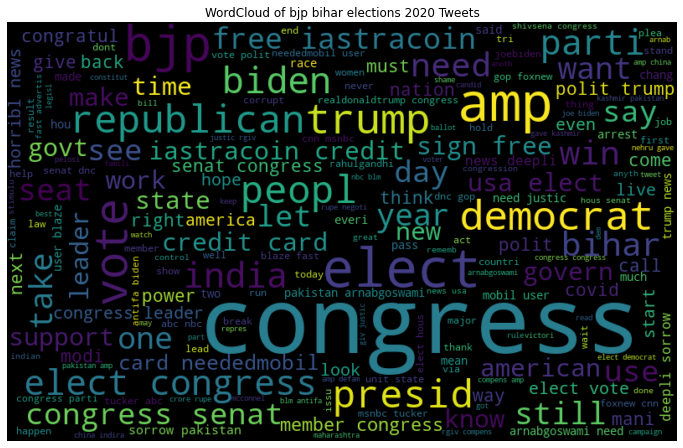

In [ ]:
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of bjp bihar elections 2020 Tweets")
plt.show()

# **Sentiment Analysis**

In [ ]:
from textblob import TextBlob

In [ ]:
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

2843

In [ ]:
df['Processed_Tweet']

2       [bjpfailedu, govern, made, lot, promis, win, v...
5       [plan, share, liter, everi, day, next, month, ...
6                                 [also, known, congress]
7       [exactli, peopl, shore, shore, border, border,...
8       [trump, learn, creat, law, use, executiveact, ...
                              ...                        
3514             [congratul, good, friend, member, elect]
3515    [congress, work, leadership, sonia, gandhi, ra...
3519    [congrat, elect, congress, one, leader, next, ...
3520    [polit, parti, like, congress, ncp, shivsena, ...
3521    [breakingnew, breakingpol, elect, covid, happy...
Name: Processed_Tweet, Length: 2843, dtype: object

In [ ]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 1012
Negative Tweets: 321
Neutral Tweets 1510




```
Classifying Tweets As Positive,Negetive and Neutral
```



In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.0,0.703,0.297,0.5859
1,0.0,0.625,0.375,0.6597
2,0.0,1.000,0.000,0.0000
3,0.0,1.000,0.000,0.0000
4,0.0,1.000,0.000,0.0000
...,...,...,...,...
2838,0.0,0.330,0.670,0.7269
2839,0.0,1.000,0.000,0.0000
2840,0.0,1.000,0.000,0.0000
2841,0.0,0.815,0.185,0.3612


In [ ]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.0,0.703,0.297,0.5859,Positive
1,0.0,0.625,0.375,0.6597,Positive
2,0.0,1.000,0.000,0.0000,Neutral
3,0.0,1.000,0.000,0.0000,Neutral
4,0.0,1.000,0.000,0.0000,Neutral


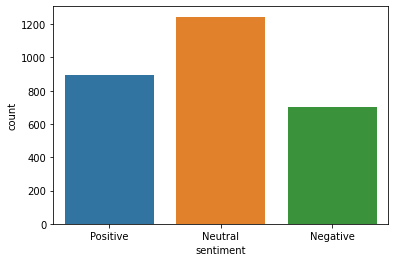

In [ ]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)